In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import statsmodels.api as sm

In [6]:
## Setup the population model and simulate a sample
a = 1.25
b = 2.45
d = 3.55

n = 100

k = 2
x1 = np.random.uniform(size=n)
x2 = np.random.uniform(size=n)
u = np.random.normal(size=n)

In [7]:
y = a + b*x1 + d*x2 + u

In [8]:
X = np.ones((n, k+1))
X[:, 1] = x1
X[:, 2] = x2

In [9]:
reg = sm.OLS(y, X)

In [10]:
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.30e-24
Time:                        15:57:24   Log-Likelihood:                -142.33
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9878      0.257      3.845      0.0

In [12]:
results.params[1]

2.415213099821235

In [17]:
M = 10_000

b1 = np.empty(M)
b2 = np.empty(M)

for i in range(M):
    u = np.random.normal(size=n)
    y = a + b*x1 + d*x2 + u
    reg = sm.OLS(y, X)
    results = reg.fit()
    b1[i] = results.params[1]
    b2[i] = results.params[2]

In [20]:
b1[:10]

array([2.37704229, 2.40714551, 2.56193383, 2.01542903, 2.94829355,
       2.07141202, 2.64310995, 3.0942482 , 2.0753627 , 2.54040925])

In [21]:
b2[:10]

array([3.40258647, 3.81006227, 3.77550871, 4.37640375, 3.57498534,
       3.26114485, 3.33456235, 3.9595578 , 3.31889103, 3.34429535])

In [22]:
## Sample average, std err of b1
b1.mean(), b1.std(ddof=1)

(2.4495590682795925, 0.3599014664092335)

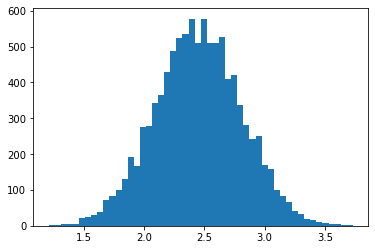

In [24]:
plt.hist(b1, bins=50);

<AxesSubplot:ylabel='Density'>

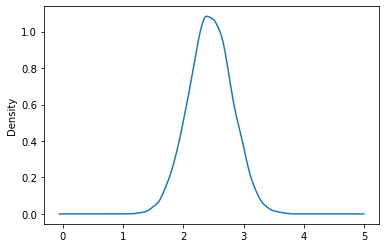

In [25]:
pd.Series(b1).plot.kde()

In [26]:
b2.mean(), b2.std(ddof=1)

(3.5493453880380375, 0.3560250366037466)

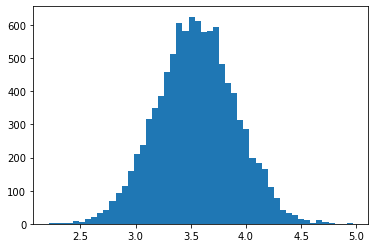

In [31]:
plt.hist(b2, bins=50);

<AxesSubplot:ylabel='Density'>

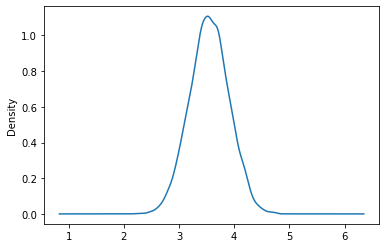

In [32]:
pd.Series(b2).plot.kde()

In [33]:
## Simulate omitted variable bias
b_ov = np.empty(M)

for i in range(M):
    u = np.random.normal(size=n)
    y = a + b*x1 + d*x2 + u
    X = np.ones((n,2))
    X[:,1] = x1
    reg = sm.OLS(y, X)
    results = reg.fit()
    b_ov[i] = results.params[1]

In [34]:
b_ov.mean(), b_ov.std(ddof=1)

(3.1281968670591604, 0.34767194309778876)

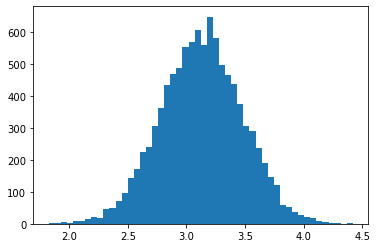

In [35]:
plt.hist(b_ov, bins=50);